In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # ✅ Add this line
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import joblib


# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model
joblib.dump(model, 'iris_model.pkl')
print("✅ Model trained and saved.")


✅ Model trained and saved.


In [49]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_df = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                            columns=iris.feature_names)
    
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0]

    print(f"🌼 Predicted Species: {iris.target_names[prediction]}\n")
    print("📊 Prediction Probabilities:")
    for i, name in enumerate(iris.target_names):
        print(f" - {name}: {prediction_proba[i]*100:.2f}%")
    
    # Optional: Show probability bar chart
    plt.figure(figsize=(6, 3))
    plt.bar(iris.target_names, prediction_proba, color='skyblue')
    plt.title("Prediction Probabilities")
    plt.ylabel("Probability")
    plt.show()



🌼 Predicted Species: versicolor

📊 Prediction Probabilities:
 - setosa: 0.00%
 - versicolor: 99.00%
 - virginica: 1.00%


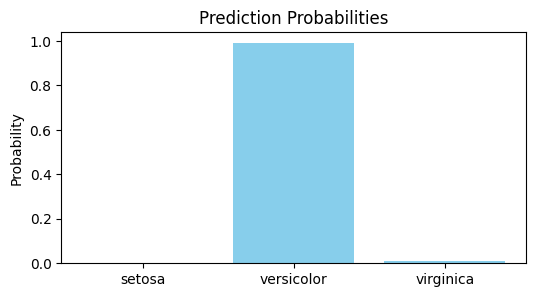

In [50]:
# 🔍 Change these values to test different predictions
predict_species(
    sepal_length=6.0,
    sepal_width=3.0,
    petal_length=4.5,
    petal_width=1.5
)



In [51]:
!pip install ipywidgets


In [52]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders
sl = widgets.FloatSlider(value=5.1, min=4.0, max=8.0, step=0.1, description='Sepal Length')
sw = widgets.FloatSlider(value=3.5, min=2.0, max=4.5, step=0.1, description='Sepal Width')
pl = widgets.FloatSlider(value=1.4, min=1.0, max=7.0, step=0.1, description='Petal Length')
pw = widgets.FloatSlider(value=0.2, min=0.1, max=2.5, step=0.1, description='Petal Width')

display(sl, sw, pl, pw)


FloatSlider(value=5.1, description='Sepal Length', max=8.0, min=4.0)

FloatSlider(value=3.5, description='Sepal Width', max=4.5, min=2.0)

FloatSlider(value=1.4, description='Petal Length', max=7.0, min=1.0)

FloatSlider(value=0.2, description='Petal Width', max=2.5, min=0.1)